In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = '../additional_code/al_res_gwen.tsv'
nmr, yields, energy = np.loadtxt(filename, unpack=True)

In [25]:
!cat $filename

# NMR       Y (arb)     E (keV)
1664        42.7        1326.95
1662        71.6        1323.76
1660.9      73.4        1322.01
1660        68.7        1320.58
1659        67.5        1318.99
1658        53.5        1317.40
1658        38.8        1317.40
1657.88      9.17       1317.21
1657.8       2.88       1317.08
1657         1.27       1315.81

1660.1      47.3        1320.74
1659        44.0        1318.99
1658.6      47.5        1318.35
1658.35     48.3        1317.95
1658.1      44.2        1317.56
1657.9      19.0        1317.24
1657.7       1.36       1316.92


In [3]:
K = (45.493 + 45.502 + 45.512) / 3

def get_energy(field, charge=1, mass=1.007825):
    return (field * charge / K / np.sqrt(mass))**2

np.isclose(get_energy(nmr), energy)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [4]:
nmr = np.flip(nmr, axis=0)
yields = np.flip(yields, axis=0)
energy = np.flip(energy, axis=0)

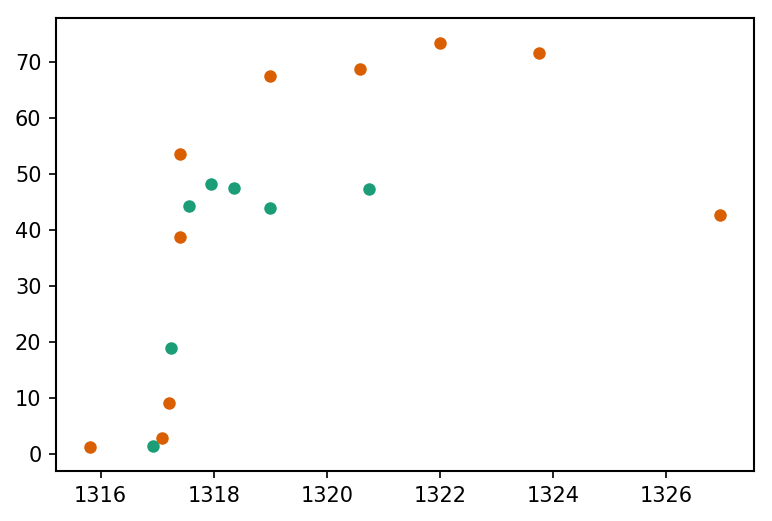

In [6]:
plt.scatter(energy[:-10], yields[:-10])
plt.scatter(energy[-10:], yields[-10:])

In [7]:
e_1, y_1 = energy[:-10], yields[:-10]
e_2, y_2 = energy[-10:-1], yields[-10:-1]
e_1, y_1

(array([ 1316.92,  1317.24,  1317.56,  1317.95,  1318.35,  1318.99,  1320.74]),
 array([  1.36,  19.  ,  44.2 ,  48.3 ,  47.5 ,  44.  ,  47.3 ]))

In [15]:
plateau_1 = np.mean(y_1[2:])
plateau_2 = np.mean(y_2[5:-1])
plateau_1, plateau_2

(46.260000000000005, 69.86666666666666)

In [10]:
e_2[1:5], y_2[1:5]

(array([ 1317.08,  1317.21,  1317.4 ,  1317.4 ]),
 array([  2.88,   9.17,  38.8 ,  53.5 ]))

In [11]:
pars_1 = np.polyfit(e_1[:3], y_1[:3], deg=1)
pars_2 = np.polyfit(e_2[1:4], y_2[1:4], deg=1)
pars_1, pars_2

(array([  6.69375000e+01,  -8.81512325e+04]),
 array([  1.15455598e+02,  -1.52064628e+05]))

(0, 80)

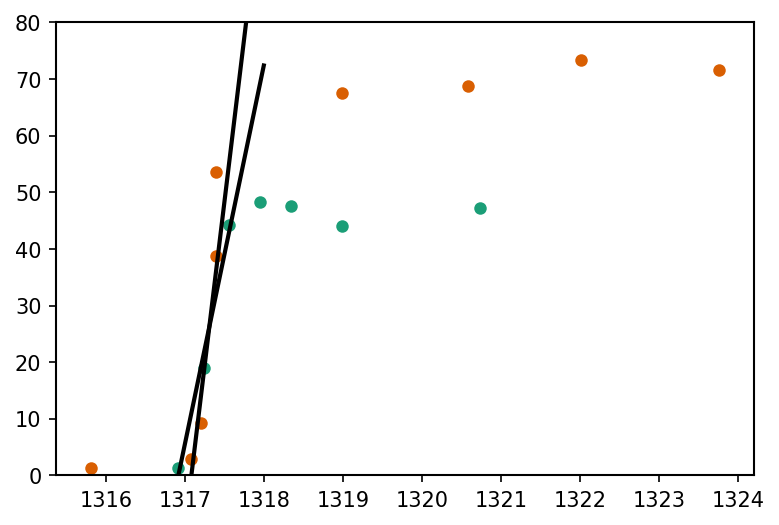

In [19]:
x_test = np.linspace(1316.75, 1318.0)

plt.scatter(e_1, y_1)
plt.scatter(e_2, y_2)
plt.plot(x_test, np.polyval(pars_1, x_test), 'k-')
plt.plot(x_test, np.polyval(pars_2, x_test), 'k-')
plt.ylim(0, 80)

In [23]:
upper, lower = plateau_1 * 0.88, plateau_1 * 0.12
print(lower, upper)

indices = np.searchsorted(np.polyval(pars_1, x_test), (upper, lower))
FWHM = x_test[indices + 1][0] - x_test[indices][1]
beam_sigma = FWHM / 2.35
beam_sigma, FWHM

5.5512 40.7088


(0.23881893182804442, 0.56122448979590445)

In [24]:
upper, lower = plateau_2 * 0.88, plateau_2 * 0.12
print(lower, upper)

indices = np.searchsorted(np.polyval(pars_2, x_test), (upper, lower))
FWHM = x_test[indices + 1][0] - x_test[indices][1]
beam_sigma = FWHM / 2.35
beam_sigma, FWHM

8.384 61.4826666667


(0.20625271385152372, 0.48469387755108073)